# Polynômes de Tchebychev

In [1]:
from typing import List

Polynome = List[float] # alias de type pour clarifier le code

In [2]:
def normalise(p: Polynome) -> Polynome:
    n = len(p)
    if n == 0:
        raise ValueError("Un polynôme ne peut être vide")
    fin = n - 1
    while p[fin] == 0 and fin > 0:
        fin -= 1
    return p[:fin + 1]

def degre(p: Polynome) -> float:
    p = normalise(p)
    if p == [0]:
        return -float("inf")
    else:
        return len(p) - 1

In [3]:
p = [1, 2, 3, 0, 0, 0]
degre(p)

2

In [4]:
degre([0, 0, 0])

-inf

Pour `etape` on sait que deg(M) = deg(L) + 1 car M représente $T_{n+1}$ et L représente $T_n$ dans la relation $T_{n + 2} = 2XT_{n + 1} - T_n$.

In [5]:
def etape(Tn: Polynome, Tn_plus_1: Polynome) -> Polynome:
    T1 = [0] + Tn_plus_1[:]
    T2 = Tn[:] + [0, 0]
    return [2*T1[i] - T2[i] for i in range(len(T1))]

In [6]:
T0 = [1]
T1 = [0, 1]

T2 = etape(T0, T1)
T3 = etape(T1, T2)
T3

[0, -3, 0, 4]

In [7]:
def tchebychev1(n: int) -> Polynome:
    ta, tb = [1], [0, 1]
    if n == 0:
        return ta
    for _ in range(n - 1):
        ta, tb = tb, etape(ta, tb)
    return tb
    

In [8]:
def tchebychev2(n: int) -> Polynome:
    if n == 0:
        return [1]
    elif n == 1:
        return [0, 1]
    else: 
        return etape(tchebychev2(n - 2), tchebychev2(n - 1))

In [19]:
%timeit tchebychev1(30)

62.3 µs ± 753 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [20]:
%timeit tchebychev2(30)

1.55 s ± 11.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
tchebychev = tchebychev1

In [12]:
def evalue(p: Polynome, x: float) -> float:
    val = 0
    for i in range(len(p)):
        val += p[i] * x**i
    return val

Un autre algorithme pour calculer p(x) à explorer et justifier. Expliquer également pourquoi il est plus efficace.

In [13]:
def evalue2(p: Polynome, x: float) -> float:
    val = p[-1]
    for k in range(degre(p) - 1, -1, -1):
        val = x*val + p[k]
    return val

In [14]:
evalue([-1, 10, 4], 2) # -1*2^0 + 10*2^1 + 4*2^2 = 35

35

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def trace_tchebychev(n: int) -> None:
    p = tchebychev(n)
    X = np.linspace(-1,1, 200)
    Y = np.array([evalue(p, x) for x in X])
    # un plt.plot(X, Y) suffit aux concours
    ############################################
    # on ajoute ça pour rendre la figure plus jolie 
    fig, ax = plt.subplots(1, 1, figsize = (4, 4))
    ax.plot(X, Y)
    ax.grid(True)
    ax.axhline(y=0, lw=3, color='b')
    ax.axvline(x=0, lw=3, color='b')
    #############################################
    plt.show()

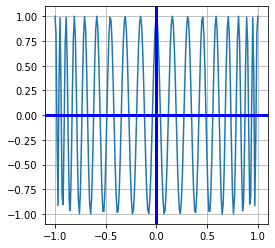

In [16]:
trace_tchebychev(40)